## Description

* Analyzes the impact that the neighborhood facilites have on property prices.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [3]:
def min_max_scale(df, cols):
    mm_scaler = MinMaxScaler() 
    scaled_array = mm_scaler.fit_transform(df[cols])
    return pd.DataFrame(scaled_array, columns=cols)

def corr(df):
    corr = df.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
    plt.show()

def six_sigma_filter(df, column):
    sigma = df[column].std()
    mu = df[column].mean()
    three_sigma = [mu-(3*sigma), mu+(3*sigma)]
    print("Column:{}, Mean:{}, Sigma:{}, 6 sigma_range: {}:{}".format(column,mu.round(3),
                                                                       sigma.round(3),
                                                                       three_sigma[0].round(2),
                                                                       three_sigma[1].round(2)))
    
    # filter
    df_to_keep = df[(df[column] > three_sigma[0]) & (df[column] < three_sigma[1])]
    
    # prints
    num_rows_dropped = df.shape[0] - df_to_keep.shape[0]
    print("Number of rows dropped: " + str(num_rows_dropped))
    
    return df_to_keep

In [4]:
facilities_path = '../Data/arcgis/neighborhood_facilities_2019_1_miles.csv'
prop_path = '../Data/arcgis/property_point_view_2019.csv'

In [5]:
prop_df = pd.read_csv(prop_path)
facilities_df = pd.read_csv(facilities_path)

df = prop_df.merge(facilities_df, left_index=True, right_index=True) 
df = df.rename(columns={'SQRD_FOOT_PRICE':'PPSF'})

In [9]:
# facilities
facilities_df.head()

grocery_count  restaurant_count  hospitals_count  coffee_count  bars_count  \
0              5                18                0             0           0   
1              2                12                0             0           0   
2              2                12                0             0           0   
3              2                 7                0             0           0   
4              4                17                0             0           0   

   gas_count  parks_count  edu_count  
0          8            9          4  
1          7            6          4  
2          8            6          4  
3          3            6          6  
4          8            8          4

In [82]:
facilities_cols = ['grocery_count', 'restaurant_count', 'hospitals_count',
                         'coffee_count', 'gas_count', 'parks_count',
                         'edu_count', 'PRICE_1', 'PPSF']

prop_features = ['BEDROOM_COUNT', 'BATHROOM_COUNT', 'HALF_BATHROOM_COUNT', 
                 'BUILDING_HEATED_AREA', 'PRICE_1', 'PPSF']


In [83]:
# filter

min_price = 250_000
max_price = 450_000
min_beds  = 1
max_beds  = 3
min_baths = 1
max_baths = 3

price_facilites_df = df
price_facilites_df = price_facilites_df[(price_facilites_df['PRICE_1'] >= min_price) & 
                                        (price_facilites_df['PRICE_1'] <= max_price) & 
                                        (price_facilites_df['BEDROOM_COUNT'] >= min_beds) & 
                                        (price_facilites_df['BEDROOM_COUNT'] <= max_beds) & 
                                        (price_facilites_df['BATHROOM_COUNT'] >= min_baths) &    
                                        (price_facilites_df['BATHROOM_COUNT'] <= max_baths)]

price_facilites_df = price_facilites_df[facilities_cols]
print(price_facilites_df.shape)
price_facilites_df

(6071, 9)


grocery_count  restaurant_count  hospitals_count  coffee_count  \
4                  4                17                0             0   
25                15                18                0             2   
27                15                16                0             1   
32                10                 9                0             0   
37                16                20                0             3   
...              ...               ...              ...           ...   
16385              0                 0                0             0   
16388              0                 0                0             0   
16389              3                20                0             2   
16392              0                 0                0             0   
16397              0                 0                0             0   

       gas_count  parks_count  edu_count   PRICE_1        PPSF  
4              8            8          4  335000.0  220.830587  
25             2            7          8  251000.0  122.978932  
27             2            8          9  250000.0  134.264232  
32             3           13         13  265000.0  176.431425  
37             6           11         10  250000.0   93.179277  
...          ...          ...        ...       ...         ...  
16385          0            0          1  250000.0  225.428314  
16388          0            2          3  252000.0  219.130435  
16389          5            1          7  275000.0  199.275362  
16392          0            2          3  285500.0  169.940476  
16397          0            2          3  265000.0  163.580247  

[6071 rows x 9 columns]

In [84]:
# remove outliers

# for col in facilities_cols:
#     price_facilites_df = six_sigma_filter(price_facilites_df, col)

# price_facilites_df.describe()

In [85]:
scaled = min_max_scale(price_facilites_df, facilities_cols)
scaled.describe()

grocery_count  restaurant_count  hospitals_count  coffee_count  \
count    6071.000000       6071.000000      6071.000000   6071.000000   
mean        0.178373          0.705650         0.024543      0.105617   
std         0.165274          0.365852         0.093842      0.170155   
min         0.000000          0.000000         0.000000      0.000000   
25%         0.050000          0.400000         0.000000      0.000000   
50%         0.150000          0.950000         0.000000      0.050000   
75%         0.250000          1.000000         0.000000      0.100000   
max         1.000000          1.000000         1.000000      1.000000   

         gas_count  parks_count    edu_count      PRICE_1         PPSF  
count  6071.000000  6071.000000  6071.000000  6071.000000  6071.000000  
mean      0.180563     0.213087     0.201812     0.386787     0.237471  
std       0.147506     0.197283     0.140996     0.268176     0.120343  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.066667     0.100000     0.100000     0.150000     0.155697  
50%       0.133333     0.150000     0.200000     0.350000     0.207415  
75%       0.266667     0.300000     0.300000     0.575000     0.285864  
max       1.000000     1.000000     1.000000     1.000000     1.000000

## Initial Correlation Analysis

In [86]:
# grd = sns.pairplot(data=scaled)

### Neighborhood features

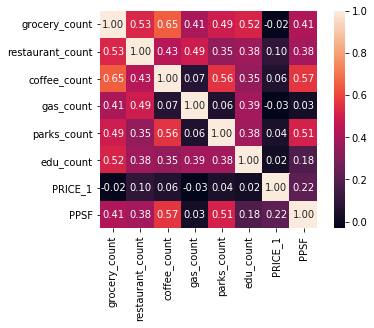

In [87]:
corr(scaled.drop(['hospitals_count'], axis=1))

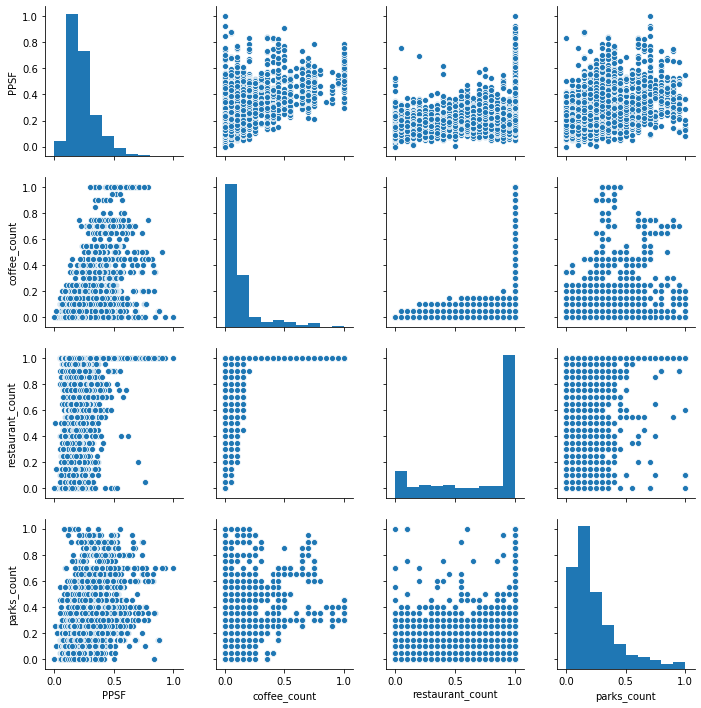

In [88]:
features_to_plot=['PPSF', 'coffee_count', 'restaurant_count', 'parks_count']
grd_2= sns.pairplot(data=scaled[features_to_plot])
# grd_2.savefig('facilities.png')

In [ ]:
# grd_scaled = sns.pairplot(data=price_facilites_df)

### Property features

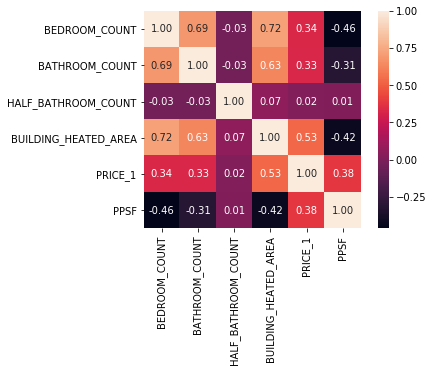

In [63]:
corr(df[prop_features])

## Focus on specific zip codes

### Get Zip code wtih largest number of properties

In [64]:
def corr_zip(zip_c, cols):
    zip_df = df[df['ZIP'] == zip_c]
    zip_df.reset_index()
    return corr(zip_df[cols])

def pairplot_zip(zip_c, cols):
    zip_df = df[df['ZIP'] == zip_c]
    zip_df.reset_index()
    return sns.pairplot(data=zip_df)

In [65]:
print(df['ZIP'].value_counts())

33033.0    666
33186.0    516
33157.0    494
33015.0    466
33032.0    431
          ... 
33158.0     25
33149.0     15
33128.0      9
33122.0      7
33109.0      2
Name: ZIP, Length: 78, dtype: int64


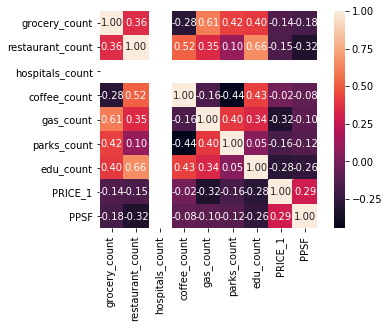

In [66]:
corr_zip(33032, facilities_cols)

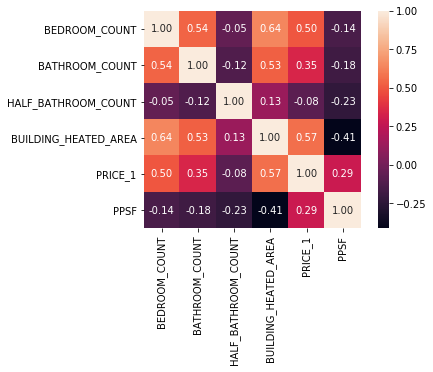

In [67]:
corr_zip(33032, prop_features)